# Linear Regression

Implementation of linear regression using Pytorch

## Necessary Imports

Import the following libraries

* torch             - Pytorch library
* torch.nn          - Pytorch's neural network class
* numpy             - Library for performing linear algebra operations
* matplotlib        - Library to visualise data and metrics

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Check if your Pytorch is GPU & CUDA enabled (only for NVIDIA GPUs)

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.current_device()

0

In [4]:
torch.cuda.get_device_name(0)

'GeForce GTX 1050 Ti'

## Create a linear dataset

Use torch's linspace to create linearly spaced data points. Make the tensor to use GPU, by setting device as cuda

In [5]:
X = torch.linspace(1, 50, 50).reshape(-1, 1).cuda()

In [6]:
X.device

device(type='cuda', index=0)

In [7]:
torch.cuda.memory_allocated()

512

Create random noise which we will add to our data points to make it slightly difficult to learn

In [8]:
noise = torch.randint(-8, 9, (50, 1), dtype=torch.float).cuda()

Create the linear dataset by using the slope formula

**y = m * x + c**

Also add the noise to it

In [9]:
y = 2 * X + 1 + noise

In [10]:
y.device

device(type='cuda', index=0)

### Visualize the data points

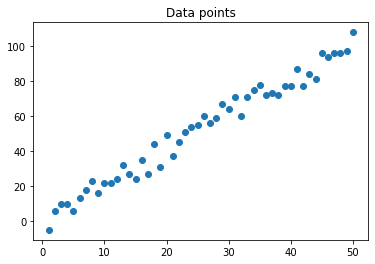

In [11]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy())
plt.title('Data points')
plt.show()

## Build the Linear Regression model

* Subclass torch.nn 's Module.
* Call the super class's initializer.
* Create a linear model using **nn.Linear(in_features, out_features)** which implements a single fully-connected / dense layer.
* Create a method named forward which will perform single forward pass to predict **y_hat** value given an input X

In [12]:
class LinearRegression(nn.Module):
    def __init__(self, in_feat, out_feat):
        super().__init__()
        self.linear_model = nn.Linear(in_feat, out_feat)
        
    def forward(self, X):
        return self.linear_model(X)

Instantiate the LinearRegression model with 1 input feature and 1 output value

In [13]:
model = LinearRegression(in_feat=1, out_feat=1).cuda()

Set the following training configuration:

* Use MSE loss as cost / loss fucntion
* Use SGD optimizer with learning rate preferrably 0.001
* Number of training iterations as epochs
* An empty list to store our losses for every single iteration, which we will use to visualize later

In [14]:
criterion = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.0001)
epochs = 100
losses = []

Train the model

In [15]:
for e in range(epochs):
    # perform one forward pass
    y_hat = model.forward(X)
    loss = criterion(y_hat, y)
    losses.append(loss)
    
    # display training metrics
    if (e % 10 == 0) or e==0 or e==(epochs-1):
        print("Epoch {}".format(e+1))
        print("Loss: {:.4f}".format(loss))
    
    # back propagation
    optim.zero_grad()
    loss.backward()
    optim.step()

Epoch 1
Loss: 1524.2700
Epoch 11
Loss: 58.4294
Epoch 21
Loss: 24.6805
Epoch 31
Loss: 23.9029
Epoch 41
Loss: 23.8843
Epoch 51
Loss: 23.8833
Epoch 61
Loss: 23.8826
Epoch 71
Loss: 23.8820
Epoch 81
Loss: 23.8813
Epoch 91
Loss: 23.8807
Epoch 100
Loss: 23.8801


## Evaluation

Plot the losses to see if it converges near 0

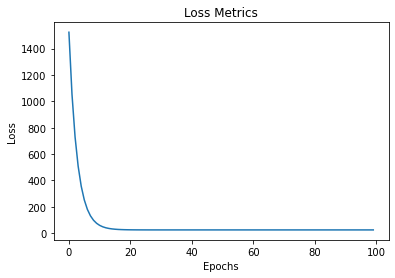

In [16]:
plt.plot(range(epochs), losses)
plt.title('Loss Metrics')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

Create a fitting line using the trained model's weight and bias

In [17]:
weight, bias = model.linear_model.weight.item(), model.linear_model.bias.item()
print("Trained Weight: {:.4f}\nTrained Bias: {:.4f}".format(weight, bias))

x1 = np.array([X.min(),X.max()])
line = x1 * weight + bias

Trained Weight: 2.0621
Trained Bias: -0.5038


Plot the datapoints with its fitting line to see if the model has learned properly

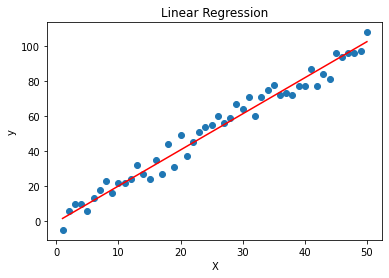

In [18]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy())
plt.plot(x1, line, 'r')
plt.title('Linear Regression')
plt.ylabel('y')
plt.xlabel('X')
plt.show()